## BBM 409 - Programming Assignment 4

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. It is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

###  Insert personal information (name, surname, student id)
Durmuş Selim Özçelik 2220356116

### 1. Introduction
* Brief overview of the task.
* Answer the questions like, What are the main components of a Naive Bayes classifier?, Why do we use Naive Bayes in text classification tasks?, What is the significance of Laplace smoothing in Naive Bayes? etc.
* Description of the dataset used for text classification.

1) The task at hand is to develop a Naive Bayes classifier to predict whether an email is spam or ham (not spam) based on the text content of the emails. This involves several key steps, including data preprocessing, feature extraction, model training, and evaluation. The main goal is to accurately classify emails into spam and ham categories, which can help in filtering out unwanted emails and ensuring that important communications are not missed.

2) Naive Bayes Classifier

A Naive Bayes classifier is a probabilistic machine learning model that is used for classification tasks. The crux of the classifier is based on the Bayes theorem. Despite its simplicity, Naive Bayes can be surprisingly accurate and is particularly good at text classification tasks.

The main components of a Naive Bayes classifier are:

Class: This is the outcome or the target variable that the model predicts.
Features: These are the independent variables or predictors. They are used to predict the class.
Likelihood: This is the probability of a feature given a class.
Prior Probability: This is the probability of occurrence of each class in the training set.
Posterior Probability: This is the probability of a class given a set of features, and it’s what we’re interested in predicting.
Why Naive Bayes for Text Classification?

Naive Bayes is widely used in text classification due to its simplicity, speed, and efficiency. It’s particularly effective in high-dimensional spaces, as is often the case with text data. It’s called ‘naive’ because it makes the assumption that all features are independent of each other, which is often not the case in real-world scenarios. However, despite this ‘naive’ assumption, it often performs surprisingly well.

3) The dataset in question is typically used for spam detection and contains emails that are labeled as either "spam" or "ham" (not spam).

Structure of the Dataset
The dataset is in a CSV format and typically includes the following columns:

Text: This column contains the body of the email, which is the actual content that we will analyze to determine whether the email is spam or ham.
Spam: This column contains labels indicating whether the email is spam (1) or not spam (0).

### 2. Importing Necessary Libraries and Reading the Data

In [ ]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import math
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## Read csv data
emails_df = pd.read_csv('emails.csv')
print("Dataset Head:")
print(emails_df.head())


Dataset Head:
                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


In [ ]:
print(emails_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB
None


### 3. Data Understanding and Preperation

##  Examine the E-Mail Spam Dataset to understand its structure and contents.
* Using the histograms show the distribution of dataset into the spam and ham
emails. (or you can use pie chart)
* Assess the feasibility of current dataset to predict spam or ham based on the
words present in the email text.
* To do so, calculate the frequencies of the words in spam and ham emails. You
can create a frequency dictionary to effectively examine the words and use
them later for Naive Bayes classification.
* Based on the word frequencies, consider leaving out some unique words that
appear less frequently than a specific frequency or appear more frequently than
a specific frequency since they might not be useful. To decide the threshold,
you might need to plot the word frequencies and see in which range of the
frequencies most words are found. Explain why some words might not be
useful for prediction and show your reasoning.
* Provide three examples of keywords that may be indicative of spam or ham,
along with their respective frequencies in spam and ham emails. To decide
this you can use a scatter plot to visualize the word frequencies in logarithmic
scale. You can also choose another visualization process that might help you
to decide. Explain and show your reasoning.

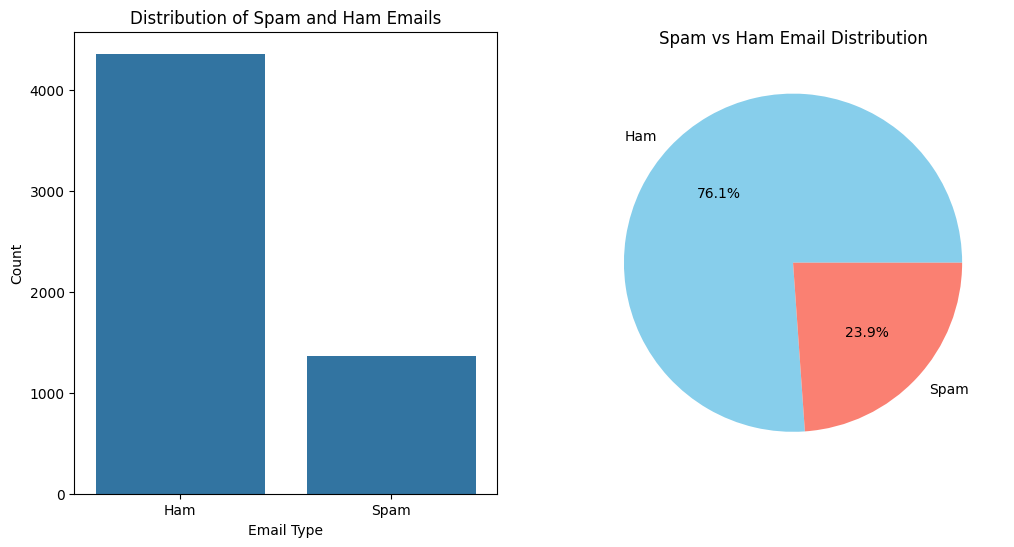

In [ ]:

# Visualize the distribution of spam and ham emails
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='spam', data=emails_df)
plt.title('Distribution of Spam and Ham Emails')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.xlabel('Email Type')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
emails_df['spam'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Ham', 'Spam'], colors=['skyblue', 'salmon'])
plt.title('Spam vs Ham Email Distribution')
plt.ylabel('')

plt.show()


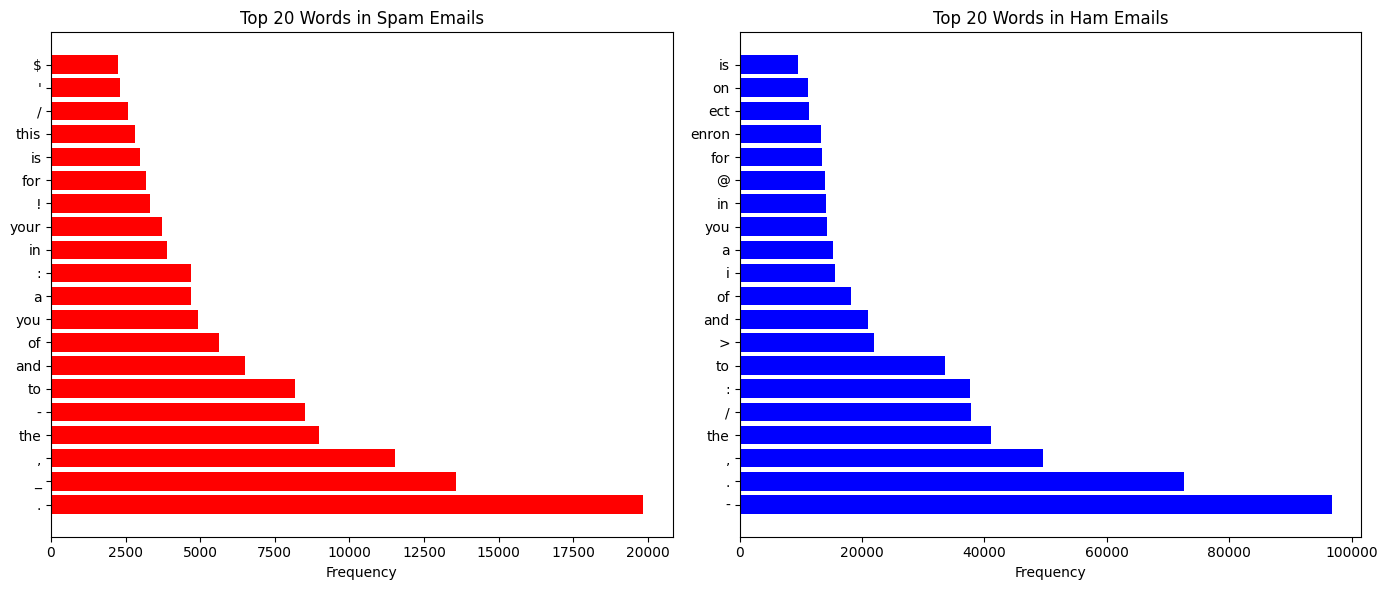

In [ ]:
# Importing necessary libraries for text processing
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

# Vectorize the email text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(emails_df['text'])

# Create frequency dictionaries for spam and ham emails
spam_word_freq = defaultdict(int)
ham_word_freq = defaultdict(int)

# Populate the frequency dictionaries
for i, email in enumerate(emails_df['text']):
    words = email.split()
    if emails_df['spam'][i] == 1:
        for word in words:
            spam_word_freq[word] += 1
    else:
        for word in words:
            ham_word_freq[word] += 1

# Convert the frequency dictionaries to DataFrames for easy plotting
spam_freq_df = pd.DataFrame(spam_word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
ham_freq_df = pd.DataFrame(ham_word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plot the top 20 words in spam and ham emails
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.barh(spam_freq_df.head(20)['Word'], spam_freq_df.head(20)['Frequency'], color='red')
plt.title('Top 20 Words in Spam Emails')
plt.xlabel('Frequency')

plt.subplot(1, 2, 2)
plt.barh(ham_freq_df.head(20)['Word'], ham_freq_df.head(20)['Frequency'], color='blue')
plt.title('Top 20 Words in Ham Emails')
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()



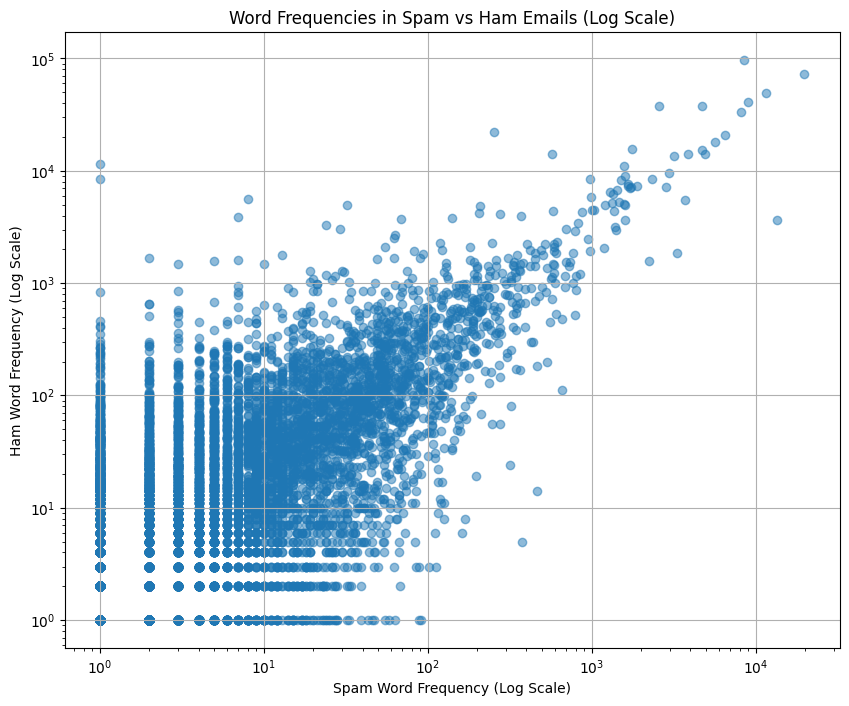

In [ ]:
# Combine both frequency dictionaries into one DataFrame for comparison
combined_freq_df = pd.merge(spam_freq_df, ham_freq_df, on='Word', how='outer', suffixes=('_spam', '_ham')).fillna(0)

# Plotting the word frequencies in logarithmic scale
plt.figure(figsize=(10, 8))
plt.scatter(combined_freq_df['Frequency_spam'], combined_freq_df['Frequency_ham'], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Spam Word Frequency (Log Scale)')
plt.ylabel('Ham Word Frequency (Log Scale)')
plt.title('Word Frequencies in Spam vs Ham Emails (Log Scale)')
plt.grid(True)
plt.show()




In [ ]:
# Determine thresholds for filtering out less/more frequent words
threshold_min = 5
threshold_max = 5000

# Filter out words based on the determined thresholds
filtered_combined_freq_df = combined_freq_df[(combined_freq_df['Frequency_spam'] > threshold_min) & (combined_freq_df['Frequency_spam'] < threshold_max) &
                                             (combined_freq_df['Frequency_ham'] > threshold_min) & (combined_freq_df['Frequency_ham'] < threshold_max)]

# Explanation of why some words might not be useful
print("Words that appear too infrequently might not provide significant information for classification, while words that appear too frequently in both classes might not be distinctive enough to differentiate between spam and ham emails.")



Words that appear too infrequently might not provide significant information for classification, while words that appear too frequently in both classes might not be distinctive enough to differentiate between spam and ham emails.


Indicative Spam Keywords and Their Frequencies:
     Word  Frequency_spam  Frequency_ham
26      .         19839.0        72655.0
3686    _         13556.0         3678.0
24      ,         11514.0        49629.0

Indicative Ham Keywords and Their Frequencies:
   Word  Frequency_spam  Frequency_ham
25    -          8514.0        96708.0
26    .         19839.0        72655.0
24    ,         11514.0        49629.0


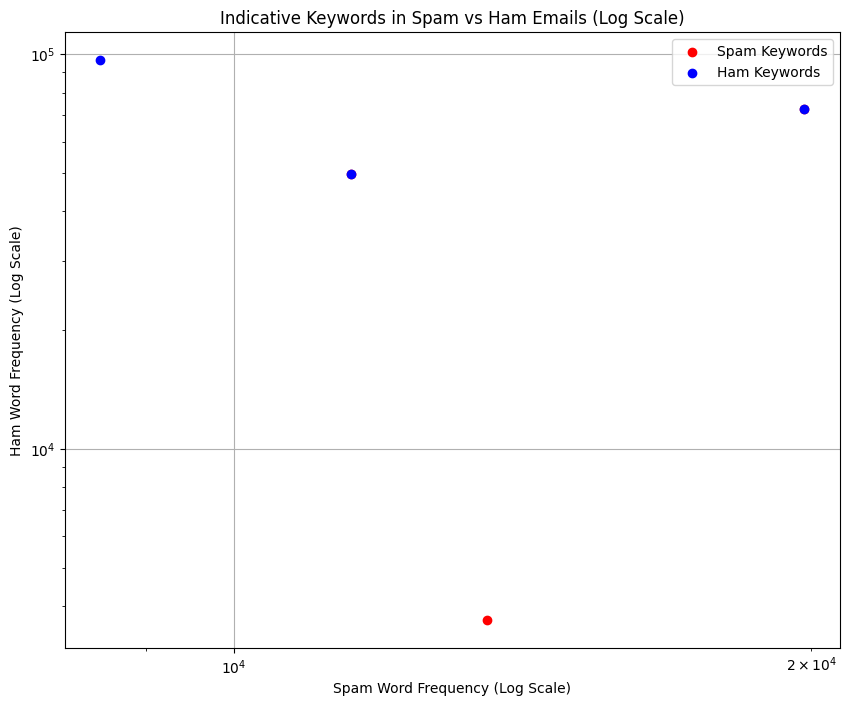

In [ ]:
# Selecting three indicative keywords for spam and ham
spam_keywords = combined_freq_df.sort_values(by='Frequency_spam', ascending=False).head(3)
ham_keywords = combined_freq_df.sort_values(by='Frequency_ham', ascending=False).head(3)

# Display the indicative keywords and their frequencies
print("Indicative Spam Keywords and Their Frequencies:")
print(spam_keywords[['Word', 'Frequency_spam', 'Frequency_ham']])

print("\nIndicative Ham Keywords and Their Frequencies:")
print(ham_keywords[['Word', 'Frequency_spam', 'Frequency_ham']])

# Visualize the indicative keywords using a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(spam_keywords['Frequency_spam'], spam_keywords['Frequency_ham'], color='red', label='Spam Keywords')
plt.scatter(ham_keywords['Frequency_spam'], ham_keywords['Frequency_ham'], color='blue', label='Ham Keywords')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Spam Word Frequency (Log Scale)')
plt.ylabel('Ham Word Frequency (Log Scale)')
plt.title('Indicative Keywords in Spam vs Ham Emails (Log Scale)')
plt.legend()
plt.grid(True)
plt.show()



### 4. Data Representation and Naive Bayes Implementation

* Split your dataset into training and test sets (80-20 split ratio).
* Prepare your training and test data to align with the requirements of your
Naive Bayes implementation. Remember, the training data will provide the
necessary insights to predict whether the test data is spam or ham.
* Represent the data using the Bag of Words (BoW) model with two methods:
Unigram and Bigram. You need to compare the usage of these two methods.
* Create Unigrams and Bigrams then implement your own Naive Bayes classifier,
considering:

  1.   Log probabilities to prevent numerical underflow.
  2.   Dealing with words not encountered during training (possibly using Laplace
  smoothing).
  3. Using a dictionary for BoW representation (either implementing your own
  method or utilizing CountVectorizer from scikit-learn)

#### Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(emails_df['text'], emails_df['spam'], test_size=0.2, random_state=42)

# Check the sizes of the training and test sets
print(f'Training set size: {len(X_train)} emails')
print(f'Test set size: {len(X_test)} emails')


Training set size: 4582 emails
Test set size: 1146 emails


Bow Representation

In [ ]:
# Import CountVectorizer for BoW representation
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer instances for Unigram and Bigram
unigram_vectorizer = CountVectorizer(stop_words='english')
bigram_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))

# Fit and transform the training data
X_train_unigram = unigram_vectorizer.fit_transform(X_train)
X_train_bigram = bigram_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_unigram = unigram_vectorizer.transform(X_test)
X_test_bigram = bigram_vectorizer.transform(X_test)

print(f'Unigram training data shape: {X_train_unigram.shape}')
print(f'Bigram training data shape: {X_train_bigram.shape}')



Unigram training data shape: (4582, 33485)
Bigram training data shape: (4582, 317585)


In [ ]:
import numpy as np

from scipy.sparse import csr_matrix, issparse

class NaiveBayesClassifier:
    def __init__(self):
        self.classes = None
        self.log_class_priors = None
        self.feature_likelihoods = None

    def fit(self, X, y):
        # Determine the number of features and classes
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # Initialize log class priors and feature likelihoods
        self.log_class_priors = np.zeros(n_classes)
        self.feature_likelihoods = np.zeros((n_classes, n_features))

        for idx, c in enumerate(self.classes):
            # Select samples belonging to class c
            X_c = X[y == c]

            # Calculate log class prior
            self.log_class_priors[idx] = np.log(X_c.shape[0] / n_samples)

            # Calculate feature likelihoods with Laplace smoothing
            feature_sum = X_c.sum(axis=0)
            if issparse(feature_sum):
                feature_sum = feature_sum.toarray().flatten()
            self.feature_likelihoods[idx, :] = (feature_sum + 1) / (feature_sum.sum() + n_features)

    def predict(self, X):
        # Calculate log likelihood for each class
        log_likelihoods = []
        for idx, c in enumerate(self.classes):
            log_likelihood = self.log_class_priors[idx] + X @ np.log(self.feature_likelihoods[idx, :])
            log_likelihoods.append(log_likelihood)
        log_likelihoods = np.array(log_likelihoods).T

        # Return the class with the highest log likelihood
        return self.classes[np.argmax(log_likelihoods, axis=1)]




#### Training with Unigram

In [ ]:
nb_unigram = NaiveBayesClassifier()
nb_unigram.fit(X_train_unigram, y_train)


#### Testing with Unigram

In [ ]:
# Initialize and train the classifier with unigram data
y_pred_unigram = nb_unigram.predict(X_test_unigram)
print(classification_report(y_test, y_pred_unigram))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       856
           1       0.98      0.98      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



#### Training and Testing with Bigram

In [ ]:
# Initialize and train the classifier with bigram data
nb_bigram = NaiveBayesClassifier()
nb_bigram.fit(X_train_bigram, y_train)

# Predict on the test set
y_pred_bigram = nb_bigram.predict(X_test_bigram)
print(classification_report(y_test, y_pred_unigram))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       856
           1       0.98      0.98      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")

# Unigram modelinin değerlendirilmesi
evaluate_model(y_test, y_pred_unigram, 'Unigram Naive Bayes')
print()
# Bigram modelinin değerlendirilmesi
evaluate_model(y_test, y_pred_bigram, 'Bigram Naive Bayes')


Evaluation Metrics for Unigram Naive Bayes:
Accuracy: 0.9887
Precision: 0.9792
Recall: 0.9759
F1-Score: 0.9775

Evaluation Metrics for Bigram Naive Bayes:
Accuracy: 0.9860
Precision: 1.0000
Recall: 0.9448
F1-Score: 0.9716


### 5. Analyzing Word Influence

* List the 10 words whose presence most strongly predicts that an email is ham.
* List the 10 words whose absence most strongly predicts that an email is ham.
* List the 10 words whose presence most strongly predicts that an email is spam.
* List the 10 words whose absence most strongly predicts that an email is spam.
* Explain how these words were obtained in terms of conditional probabilities
used in the Naive Bayes algorithm.
* Compare the influence of word presence vs absence on predicting spam or ham.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Get the log likelihoods for ham class
ham_log_likelihoods = np.log(nb_unigram.feature_likelihoods[0])

# Get the indices of the top 10 words with highest log likelihood for ham
top_10_ham_presence_indices = np.argsort(ham_log_likelihoods)[-10:]

# Get the words corresponding to these indices
top_10_ham_presence_words = np.array(unigram_vectorizer.get_feature_names_out())[top_10_ham_presence_indices]

print("Top 10 words whose presence most strongly predicts ham:")
print(top_10_ham_presence_words)

Top 10 words whose presence most strongly predicts ham:
['pm' 'cc' 'com' 'kaminski' '2000' 'hou' 'vince' 'subject' 'ect' 'enron']


In [ ]:
# Get the log likelihoods for spam class (absence means higher likelihood for ham)
spam_log_likelihoods = np.log(nb_unigram.feature_likelihoods[1])

# Get the indices of the top 10 words with lowest log likelihood for spam
top_10_ham_absence_indices = np.argsort(spam_log_likelihoods)[:10]

# Get the words corresponding to these indices
top_10_ham_absence_words = np.array(unigram_vectorizer.get_feature_names_out())[top_10_ham_absence_indices]

print("Top 10 words whose absence most strongly predicts ham:")
print(top_10_ham_absence_words)

Top 10 words whose absence most strongly predicts ham:
['harrelson' 'pointer' 'extends' 'pointers' 'pointing' 'pointless'
 'extant' 'poinformowac' 'tulsiani' 'poisoning']


In [ ]:
# Get the log likelihoods for spam class
spam_log_likelihoods = np.log(nb_unigram.feature_likelihoods[1])

# Get the indices of the top 10 words with highest log likelihood for spam
top_10_spam_presence_indices = np.argsort(spam_log_likelihoods)[-10:]

# Get the words corresponding to these indices
top_10_spam_presence_words = np.array(unigram_vectorizer.get_feature_names_out())[top_10_spam_presence_indices]

print("Top 10 words whose presence most strongly predicts spam:")
print(top_10_spam_presence_words)

Top 10 words whose presence most strongly predicts spam:
['free' '000' 'mail' 'money' 'information' 'business' 'email' 'company'
 'com' 'subject']


In [ ]:
# Get the log likelihoods for ham class (absence means higher likelihood for spam)
ham_log_likelihoods = np.log(nb_unigram.feature_likelihoods[0])

# Get the indices of the top 10 words with lowest log likelihood for ham
top_10_spam_absence_indices = np.argsort(ham_log_likelihoods)[:10]

# Get the words corresponding to these indices
top_10_spam_absence_words = np.array(unigram_vectorizer.get_feature_names_out())[top_10_spam_absence_indices]

print("Top 10 words whose absence most strongly predicts spam:")
print(top_10_spam_absence_words)

Top 10 words whose absence most strongly predicts spam:
['zzzz' 'olariu' 'comdavid' 'olabilir' 'okym' 'comedies' 'oko' 'okmpoi'
 'okidata' 'comfortably']


### 6. Stopword Handling
Analyze the effect of stopwords on the model’s interpretation, discussing reasons for removing or keeping them.

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming

In [ ]:
import re
import string
import nltk
from nltk import PorterStemmer
from nltk import word_tokenize
from nltk.corpus import stopwords




In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

def process_mail(mail):
    """Process mail function.
    Input:
        mail: a text containing a mail
    Output:
        mails_clean: a list of words containing the processed mail
    """
    # Initialize stemmer and stopwords
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # Tokenize the mail
    tokens = nltk.word_tokenize(mail)

    # Lowercase, remove stopwords and punctuation, and apply stemming
    mails_clean = [
        stemmer.stem(token.lower())
        for token in tokens
        if token.lower() not in stop_words and token not in string.punctuation
    ]

    return mails_clean



[nltk_data] Downloading package stopwords to /Users/selim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/selim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
## process all spam training data
spam_train_emails = X_train[y_train == 1]  # Assuming '1' indicates spam
processed_spam_train_emails = spam_train_emails.apply(process_mail)
print("Processed Spam Training Emails:")
print(processed_spam_train_emails.head())

Processed Spam Training Emails:
527     [subject, secretli, record, internet, activ, c...
1297    [subject, ebay, notic, ebay, account, stolen, ...
803     [subject, enhanc, anatomi, use, product, 4, mo...
857     [subject, ilug, ilug, admin, enhanc, bust, ama...
1223    [subject, need, tjuz, cif, merci, advertis, gr...
Name: text, dtype: object


In [ ]:
## process all ham training data
ham_train_emails = X_train[y_train == 0]  # Assuming '0' indicates ham
processed_ham_train_emails = ham_train_emails.apply(process_mail)
print("\nProcessed Ham Training Emails:")
print(processed_ham_train_emails.head())



Processed Ham Training Emails:
4860    [subject, request, payrol, reclassif, approv, ...
1520    [subject, pend, approv, ibuyit, request, wince...
2083    [subject, congratul, hi, vinc, receiv, email, ...
3113    [subject, interview, schedul, monday, novemb, ...
4963    [subject, request, submit, access, request, ma...
Name: text, dtype: object


In [ ]:
## process all test data

processed_test_emails = X_test.apply(process_mail)
print("\nProcessed Test Emails:")
print(processed_test_emails.head())


Processed Test Emails:
4445    [subject, energi, deriv, confer, may, 29, toro...
4118    [subject, financi, math, cours, part, 2, vinc,...
3893    [subject, bullet, point, pleas, respond, hi, v...
4210    [subject, enron, default, swap, darrel, send, ...
5603    [subject, power, question, steve, elena, chilk...
Name: text, dtype: object


#### Training with Unigram (Stop Words Removed)

In [ ]:
# Split the preprocessed data into training and test sets
X_train_processed, X_test_processed, y_train, y_test = train_test_split(
    emails_df['text'], emails_df['spam'], test_size=0.2, random_state=42
)

# Create CountVectorizer instance for Unigram
unigram_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_unigram = unigram_vectorizer.fit_transform(X_train_processed)

# Transform the test data
X_test_unigram = unigram_vectorizer.transform(X_test_processed)

# Initialize and train the classifier with unigram data
nb_unigram = NaiveBayesClassifier()
nb_unigram.fit(X_train_unigram, y_train)


# Predict on the test set


#### Testing with Unigram (Stop Words Removed)

In [ ]:
# Predict and evaluate the model on the test set
y_pred_unigram = nb_unigram.predict(X_test_unigram)
print(f'Unigram Model Accuracy: {accuracy_score(y_test, y_pred_unigram)}')
print(classification_report(y_test, y_pred_unigram))

Unigram Model Accuracy: 0.987783595113438
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       856
           1       0.98      0.97      0.98       290

    accuracy                           0.99      1146
   macro avg       0.98      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



#### Training and Testing with Bigram (Stop Words Removed)

In [ ]:
# Create CountVectorizer instance for Bigram
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2))

# Fit and transform the training data
X_train_bigram = bigram_vectorizer.fit_transform(X_train_processed)

# Transform the test data
X_test_bigram = bigram_vectorizer.transform(X_test_processed)

# Initialize and train the classifier with bigram data
nb_bigram = NaiveBayesClassifier()
nb_bigram.fit(X_train_bigram, y_train)

# Predict and evaluate the model on the test set
y_pred_bigram = nb_bigram.predict(X_test_bigram)
print(f'Bigram Model Accuracy: {accuracy_score(y_test, y_pred_bigram)}')
print(classification_report(y_test, y_pred_bigram))

Bigram Model Accuracy: 0.9842931937172775
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       856
           1       1.00      0.94      0.97       290

    accuracy                           0.98      1146
   macro avg       0.99      0.97      0.98      1146
weighted avg       0.98      0.98      0.98      1146



#### Analyzing the Stopwords

* Identify and handle common stopwords.
* List the 10 non-stopwords that most strongly predict that an email is ham.
* List the 10 non-stopwords that most strongly predict that an email is spam.

In [ ]:
# Identify common stopwords and remove them
common_stopwords = set(stopwords.words('english'))

# Get feature names
unigram_features = np.array(unigram_vectorizer.get_feature_names_out())
bigram_features = np.array(bigram_vectorizer.get_feature_names_out())

# Calculate the log likelihoods for both classes
unigram_log_likelihoods = nb_unigram.feature_likelihoods
bigram_log_likelihoods = nb_bigram.feature_likelihoods

# Filter out stopwords from the feature set
unigram_non_stopword_indices = [i for i, feature in enumerate(unigram_features) if feature not in common_stopwords]
bigram_non_stopword_indices = [i for i, feature in enumerate(bigram_features) if all(word not in common_stopwords for word in feature.split())]

unigram_features_non_stopwords = unigram_features[unigram_non_stopword_indices]
bigram_features_non_stopwords = bigram_features[bigram_non_stopword_indices]

unigram_log_likelihoods_non_stopwords = unigram_log_likelihoods[:, unigram_non_stopword_indices]
bigram_log_likelihoods_non_stopwords = bigram_log_likelihoods[:, bigram_non_stopword_indices]

# Find the top 10 non-stopwords predicting ham and spam
top_ham_unigram_indices = np.argsort(unigram_log_likelihoods_non_stopwords[0, :])[-10:]
top_spam_unigram_indices = np.argsort(unigram_log_likelihoods_non_stopwords[1, :])[-10:]

top_ham_bigram_indices = np.argsort(bigram_log_likelihoods_non_stopwords[0, :])[-10:]
top_spam_bigram_indices = np.argsort(bigram_log_likelihoods_non_stopwords[1, :])[-10:]

print("Top 10 non-stopwords predicting ham (Unigram):")
print(unigram_features_non_stopwords[top_ham_unigram_indices])

print("Top 10 non-stopwords predicting spam (Unigram):")
print(unigram_features_non_stopwords[top_spam_unigram_indices])

print("Top 10 non-stopwords predicting ham (Bigram):")
print(bigram_features_non_stopwords[top_ham_bigram_indices])

print("Top 10 non-stopwords predicting spam (Bigram):")
print(bigram_features_non_stopwords[top_spam_bigram_indices])

Top 10 non-stopwords predicting ham (Unigram):
['would' 'com' 'please' 'kaminski' '2000' 'hou' 'vince' 'subject' 'ect'
 'enron']
Top 10 non-stopwords predicting spam (Unigram):
['one' '000' 'mail' 'money' 'information' 'business' 'email' 'company'
 'com' 'subject']
Top 10 non-stopwords predicting ham (Bigram):
['please' 'kaminski' 'ect ect' '2000' 'hou ect' 'hou' 'vince' 'subject'
 'ect' 'enron']
Top 10 non-stopwords predicting spam (Bigram):
['one' '000' 'mail' 'money' 'information' 'business' 'email' 'company'
 'com' 'subject']
